# Projeto de Deep Learning.

Neste projeto você deverá treinar diferentes modelos de classificação utilizando Deep Learning. O dataset utilizado será o CIFAR-10, que consiste em 60000 imagens 32x32 de 10 classes diferentes. Mais detalhes sobre os dados podem ser encontrados [aqui](https://www.cs.toronto.edu/~kriz/cifar.html).

Para fazer o projeto, siga os seguintes passos:

1. Treine uma MLP. Utilize Grid Search para encontrar os hiperparâmetros da rede (quantidade de camada ocultas, neurônios por camada, tamanho do batch, etc.).
2. Treine uma CNN com as configurações de sua escolha utilizando filtros 3x3. Todas as camadas devem ser seguidas de MaxPooling com filtro 2x2.
3. Treine a mesma CNN do passo anterior utilizando Data Augmentation.
4. Treine duas redes utilizando os modelos VGG16 e VGG19  com pesos treinados em `imagenet`. Extenda a arquitetura dessas redes com mais uma camada densa utilizando a quantidade de neurônios de sua escolha.

Para todas as redes, utilize técnicas de combate a Overfitting e avalie os resultados com base em acurácia e perda em treino, validação e teste, mostrando os gráficos de evolução dessas métricas durante o treinamento.


In [0]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass

In [0]:
from tensorflow import keras
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
(train_all, labels_all), (test_data, test_labels) = cifar10.load_data()

In [0]:
train_data, val_data, train_labels, val_labels = train_test_split(train_all, labels_all, test_size=0.2, random_state=42)

In [0]:
print('train_data shape:', train_data.shape)
print('val_data shape:', val_data.shape)
print('test_data shape:', test_data.shape)
print(train_data.shape[0], 'train samples')
print(val_data.shape[0], 'train samples')
print(test_data.shape[0], 'test samples')

train_data shape: (40000, 32, 32, 3)
val_data shape: (10000, 32, 32, 3)
test_data shape: (10000, 32, 32, 3)
40000 train samples
10000 train samples
10000 test samples


In [0]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def get_label_name(label):
    labels = load_label_names()
    for i in range(len(label)):
      if label[i] == 1:
        return labels[i]

In [0]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
val_labels = keras.utils.to_categorical(val_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

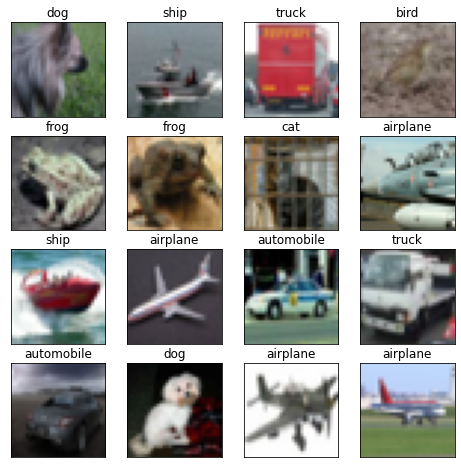

In [0]:
plt.figure(1 , figsize = (8 , 8))
n = 0 
for i in range(16):
    n += 1 
    r = np.random.randint(0 , train_data.shape[0] , 1)
    plt.subplot(4 , 4 , n)
    plt.imshow(train_data[r[0]])
    plt.title('{}'.format(get_label_name(train_labels[r[0]])))
    plt.xticks([]) , plt.yticks([])

In [0]:
train_data = train_data.astype('float32')
val_data = val_data.astype('float32')
test_data = test_data.astype('float32')
train_data = train_data / 255.0
val_data = val_data / 255.0
test_data = test_data / 255.0

## 1. Treine uma MLP. Utilize Grid Search para encontrar os hiperparâmetros da rede (quantidade de camada ocultas, neurônios por camada, tamanho do batch, etc.).

In [0]:
!pip install talos split-folders tqdm

In [0]:
p = {
    'shapes':['brick'],
    'first_neuron': [32, 64],
    'hidden_layers': [1,2],
    'dropout':[0,0.5],
    'activation': ['relu'],
    'batch_size': [8, 16],
    'epochs':[20,30]
}

In [0]:
from talos.utils import hidden_layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import talos

In [0]:
def cifar10_dataset(x_train, y_train, x_val, y_val, params):
     # replace the hyperparameter inputs with references to params dictionary 
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(params['first_neuron'], activation=params['activation']))

    hidden_layers(model, params, 1)

    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # make sure history object is returned by model.fit()
    out = model.fit(x=x_train, 
                    y=y_train,
                    validation_data=[x_val, y_val],
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0)
    
    # modify the output model
    return out, model

In [0]:
t = talos.Scan(
    x=train_data, 
    y=train_labels, 
    fraction_limit= 0.1, 
    params=p, 
    model=cifar10_dataset, 
    experiment_name='cifar10')

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [10:20<00:00, 206.73s/it]


In [0]:
results = talos.Analyze(t)

In [0]:
results.table('val_accuracy', ['val_accuracy'], ascending=False)

,val_accuracy,dropout,hidden_layers,round_epochs,accuracy,shapes,activation,loss,batch_size,epochs,first_neuron,val_loss
1,0.438833,0.0,1,30,0.482714,brick,relu,1.435195,16,30,64,1.590075
0,0.187333,0.0,1,20,0.190750,brick,relu,2.055869,8,20,32,2.063347
2,0.101083,0.5,2,30,0.099893,brick,relu,2.302782,16,30,32,2.302996


In [0]:
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(32,32,3)))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(10, activation='softmax'))
model_mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model_mlp.fit(train_data, 
                    train_labels,
                    validation_data=[val_data, val_labels],
                    epochs=20,
                    batch_size=8,
                    verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 21s 537us/step - loss: 1.9466 - acc: 0.2827 - val_loss: 1.8659 - val_acc: 0.3049
Epoch 2/20
40000/40000 [==============================] - 21s 521us/step - loss: 1.8475 - acc: 0.3287 - val_loss: 1.8082 - val_acc: 0.3259
Epoch 3/20
40000/40000 [==============================] - 20s 507us/step - loss: 1.8127 - acc: 0.3444 - val_loss: 1.7825 - val_acc: 0.3513
Epoch 4/20
40000/40000 [==============================] - 22s 550us/step - loss: 1.7907 - acc: 0.3521 - val_loss: 1.7716 - val_acc: 0.3533
Epoch 5/20
40000/40000 [==============================] - 21s 524us/step - loss: 1.7632 - acc: 0.3610 - val_loss: 1.8026 - val_acc: 0.3390
Epoch 6/20
40000/40000 [==============================] - 21s 525us/step - loss: 1.7472 - acc: 0.3667 - val_loss: 1.7330 - val_acc: 0.3670
Epoch 7/20
40000/40000 [==============================] - 22s 544us/step - loss: 1.7328 - acc: 0.3713 - val_loss: 1.

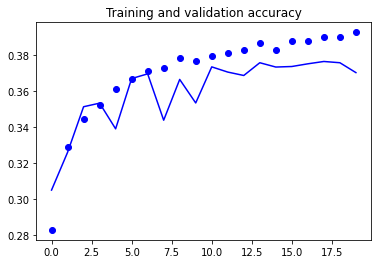

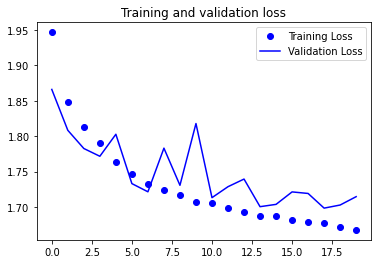

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model_mlp.evaluate(test_data,  test_labels, verbose=2)
print('\nTest model1 accuracy:', test_acc)


Test model1 accuracy: 0.37709999084472656


## 2. Treine uma CNN com as configurações de sua escolha utilizando filtros 3x3. Todas as camadas devem ser seguidas de MaxPooling com filtro 2x2.

In [0]:
import tensorflow as tf

In [0]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
____

In [0]:
train_data.shape

(40000, 32, 32, 3)

In [0]:
train_labels.shape

(40000, 10)

In [0]:
model_cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model_cnn.fit(
      train_data, train_labels,
      epochs=5,
      validation_data=(val_data, val_labels),
      verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 95s 2ms/sample - loss: 1.6195 - acc: 0.4095 - val_loss: 1.3331 - val_acc: 0.5231
Epoch 2/5
40000/40000 [==============================] - 95s 2ms/sample - loss: 1.2615 - acc: 0.5528 - val_loss: 1.1390 - val_acc: 0.5993
Epoch 3/5
40000/40000 [==============================] - 94s 2ms/sample - loss: 1.1123 - acc: 0.6065 - val_loss: 1.1251 - val_acc: 0.6033
Epoch 4/5
40000/40000 [==============================] - 95s 2ms/sample - loss: 1.0134 - acc: 0.6454 - val_loss: 1.0412 - val_acc: 0.6284
Epoch 5/5
40000/40000 [==============================] - 94s 2ms/sample - loss: 0.9451 - acc: 0.6670 - val_loss: 1.0268 - val_acc: 0.6494


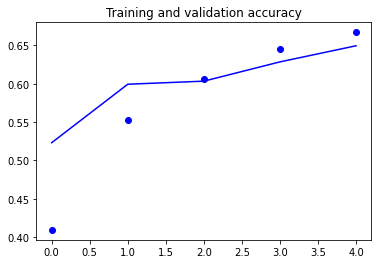

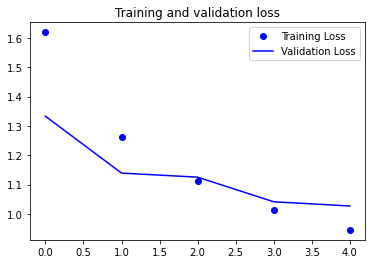

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model_cnn.evaluate(test_data,  test_labels, verbose=2)
print('\nTest model1 accuracy:', test_acc)

10000/10000 - 6s - loss: 1.0348 - acc: 0.6436

Test model1 accuracy: 0.6436


## 3. Treine a mesma CNN do passo anterior utilizando Data Augmentation.

In [0]:
model_cnn_aug = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn_aug.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [0]:
model_cnn_aug.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

'''history = model_cnn_aug.fit(
      train_data, train_labels,
      epochs=5,
      validation_data=(val_data, val_labels),
      verbose=1)'''

'history = model_cnn_aug.fit(\n      train_data, train_labels,\n      epochs=5,\n      validation_data=(val_data, val_labels),\n      verbose=1)'

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

val_generator = ImageDataGenerator(rescale=1./255)

test_generator = ImageDataGenerator(rescale=1./255)

In [0]:
train_datagen = train_generator.flow( x=train_data, 
                                      y=train_labels,
                                      batch_size=32)

val_datagen = val_generator.flow( x=val_data, 
                                  y=val_labels,
                                  batch_size=32)

test_datagen = test_generator.flow( x=test_data, 
                                    y=test_labels,
                                    batch_size=32)

test_data2, test_labels2 = test_datagen.next()

In [0]:
history = model_cnn_aug.fit_generator(
      train_datagen,
      steps_per_epoch=40000/32,  
      epochs=5,
      validation_data=val_datagen,
      validation_steps=10000/32,  
      verbose=1)

Epoch 1/5
1250/1250 [==============================] - 112s 90ms/step - loss: 2.3028 - acc: 0.0995 - val_loss: 2.3067 - val_acc: 0.0933
Epoch 2/5
1250/1250 [==============================] - 111s 89ms/step - loss: 2.3027 - acc: 0.1014 - val_loss: 2.3066 - val_acc: 0.0994
Epoch 3/5
1250/1250 [==============================] - 111s 88ms/step - loss: 2.3028 - acc: 0.0997 - val_loss: 2.3063 - val_acc: 0.0996
Epoch 4/5
1250/1250 [==============================] - 110s 88ms/step - loss: 2.3028 - acc: 0.0994 - val_loss: 2.3067 - val_acc: 0.0933
Epoch 5/5
1250/1250 [==============================] - 111s 89ms/step - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3067 - val_acc: 0.0933


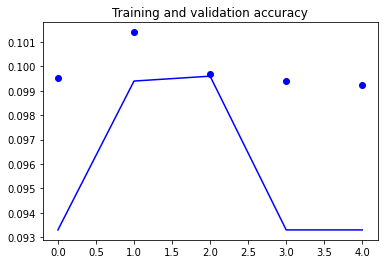

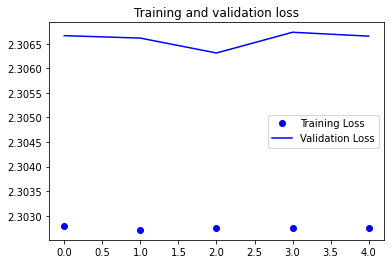

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model_cnn_aug.evaluate(test_data2,  test_labels2, verbose=2)
print('\nTest model1 accuracy:', test_acc)

32/32 - 0s - loss: 2.3023 - acc: 0.0625

Test model1 accuracy: 0.0625


## 4. Treine duas redes utilizando os modelos VGG16 e VGG19  com pesos treinados em `imagenet`. Extenda a arquitetura dessas redes com mais uma camada densa utilizando a quantidade de neurônios de sua escolha.

### VGG16

In [0]:
from keras.applications.vgg16 import VGG16

In [0]:
pre_trained_model_vgg16 = VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')
pre_trained_model_vgg16.summary()


58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_____________________________________________________________

In [0]:
for layer in pre_trained_model_vgg16.layers:
  layer.trainable = False

In [0]:
last_layer = pre_trained_model_vgg16.get_layer('block5_pool')
last_output = last_layer.output

In [0]:
from keras import layers
from keras import Model

In [0]:
x = layers.Flatten()(last_output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='softmax')(x)

model_vgg16 = Model(pre_trained_model_vgg16.input,x)

model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
history = model_vgg16.fit(
      train_data, train_labels,
      epochs=5,
      validation_data=(val_data, val_labels),
      batch_size=32,
      verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 544s 14ms/step - loss: 1.4776 - acc: 0.4801 - val_loss: 1.2659 - val_acc: 0.5546
Epoch 2/5
40000/40000 [==============================] - 547s 14ms/step - loss: 1.2552 - acc: 0.5617 - val_loss: 1.2086 - val_acc: 0.5744
Epoch 3/5
40000/40000 [==============================] - 546s 14ms/step - loss: 1.1950 - acc: 0.5835 - val_loss: 1.1785 - val_acc: 0.5854
Epoch 4/5
40000/40000 [==============================] - 546s 14ms/step - loss: 1.1564 - acc: 0.5964 - val_loss: 1.1550 - val_acc: 0.5935
Epoch 5/5
40000/40000 [==============================] - 551s 14ms/step - loss: 1.1289 - acc: 0.6077 - val_loss: 1.1268 - val_acc: 0.6057


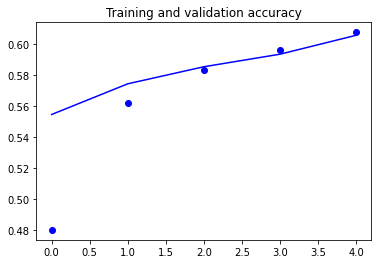

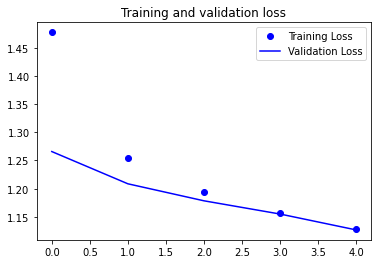

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model_vgg16.evaluate(test_data,  test_labels, verbose=2)
print('\nTest model1 accuracy:', test_acc)


Test model1 accuracy: 0.5974000096321106


### VGG19

In [0]:
from keras.applications.vgg19 import VGG19

In [0]:
pre_trained_model_vgg19 = VGG19(input_shape=(32,32,3), include_top=False, weights='imagenet')
pre_trained_model_vgg19.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [0]:
for layer in pre_trained_model_vgg19.layers:
  layer.trainable = False

In [0]:
last_layer = pre_trained_model_vgg19.get_layer('block5_pool')
last_output = last_layer.output

In [0]:
x = layers.Flatten()(last_output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='softmax')(x)

model_vgg19 = Model(pre_trained_model_vgg19.input,x)

model_vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
history = model_vgg19.fit(
      train_data, train_labels,
      epochs=5,
      validation_data=(val_data, val_labels),
      batch_size=32,
      verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 706s 18ms/step - loss: 1.5121 - acc: 0.4631 - val_loss: 1.3405 - val_acc: 0.5246
Epoch 2/5
40000/40000 [==============================] - 697s 17ms/step - loss: 1.3129 - acc: 0.5391 - val_loss: 1.2652 - val_acc: 0.5526
Epoch 3/5
40000/40000 [==============================] - 694s 17ms/step - loss: 1.2520 - acc: 0.5585 - val_loss: 1.2619 - val_acc: 0.5542
Epoch 4/5
40000/40000 [==============================] - 693s 17ms/step - loss: 1.2162 - acc: 0.5719 - val_loss: 1.2136 - val_acc: 0.5755
Epoch 5/5
40000/40000 [==============================] - 696s 17ms/step - loss: 1.1857 - acc: 0.5821 - val_loss: 1.1963 - val_acc: 0.5769


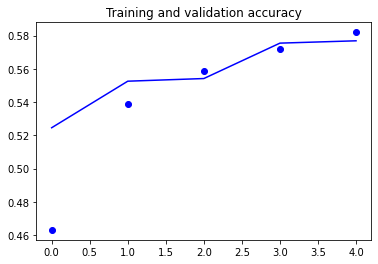

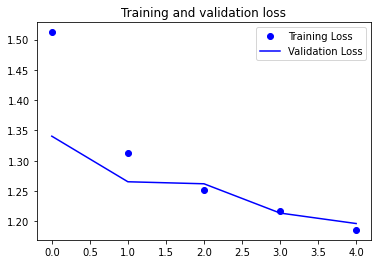

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model_vgg19.evaluate(test_data,  test_labels, verbose=2)
print('\nTest model1 accuracy:', test_acc)


Test model1 accuracy: 0.5730000138282776


## Conclusão

Todos os modelos foram treinados com 5 épocas em virtude do tempo elevado de treinamento e da instabilidade do ambiente do colab.

O modelo mais promissor foi o CNN sem data augmentation, com uma acurácia de ~65% no teste. O pior foi o CNN com data augmentation. As redes com treinadas transferindo conhecimento dos modelos VGG16 e VGG19 ficam no meio do caminho sendo a VGG16 melhor com ~60% de acurária no teste contra 57% do VGG19. A MLP resultou em uma acurária de ~38%. 

Com ao avaliar a curva, é possivel supor que a CNN sem data augmentation atingiria resultados melhores caso aumentassemos o número de épocas de treinamento.